In [1]:
import pandas as pd
import os

# Load the dataset
data = pd.read_csv("auxiliary-data\\sg-stock-prices.csv") # replace with the path to your Excel file
training = pd.read_csv("train.csv")
new_training = training

# Convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the month and year from the 'date' column
data['year'], data['month'] = data['date'].dt.year, data['date'].dt.month

# Group by company, year, and month, then calculate the mean for each group
average_monthly_data = data.groupby(['name', 'year', 'month']).mean(numeric_only=True).reset_index()

#Keep a list fo all the names of stocks
names = list(set(data['name']))

# To see the result
average_monthly_data

,name,year,month,open,high,low,close,adjusted_close
0,ASLAN Pharmaceuticals,2020,12,9.200000,9.450000,9.100000,9.150000,9.150000
1,ASLAN Pharmaceuticals,2021,1,10.357895,10.709737,10.010789,10.401316,10.401316
2,ASLAN Pharmaceuticals,2021,2,17.160000,18.692895,16.250789,17.276316,17.276316
3,ASLAN Pharmaceuticals,2021,3,19.726957,20.531522,18.113478,19.139130,19.139130
4,ASLAN Pharmaceuticals,2021,4,16.189048,16.727381,15.644048,16.102381,16.102381
...,...,...,...,...,...,...,...,...
1714,Yanlord,2023,3,0.911087,0.921087,0.896739,0.906522,0.906522
1715,Yanlord,2023,4,0.890526,0.896053,0.881316,0.886842,0.886842
1716,Yanlord,2023,5,0.832045,0.840227,0.820455,0.828409,0.828409
1717,Yanlord,2023,6,0.805000,0.817750,0.794000,0.804250,0.804250


In [2]:
#To normalize values of each stock separately
def normalize(group):
    min_val = group.min()
    max_val = group.max()
    group = (group - min_val) / (max_val - min_val)
    return group

In [3]:
#Normalizing
average_monthly_data['normalized_value'] = average_monthly_data.groupby('name')['adjusted_close'].transform(normalize)

In [4]:
average_monthly_data

,name,year,month,open,high,low,close,adjusted_close,normalized_value
0,ASLAN Pharmaceuticals,2020,12,9.200000,9.450000,9.100000,9.150000,9.150000,0.413221
1,ASLAN Pharmaceuticals,2021,1,10.357895,10.709737,10.010789,10.401316,10.401316,0.486725
2,ASLAN Pharmaceuticals,2021,2,17.160000,18.692895,16.250789,17.276316,17.276316,0.890575
3,ASLAN Pharmaceuticals,2021,3,19.726957,20.531522,18.113478,19.139130,19.139130,1.000000
4,ASLAN Pharmaceuticals,2021,4,16.189048,16.727381,15.644048,16.102381,16.102381,0.821616
...,...,...,...,...,...,...,...,...,...
1714,Yanlord,2023,3,0.911087,0.921087,0.896739,0.906522,0.906522,0.317177
1715,Yanlord,2023,4,0.890526,0.896053,0.881316,0.886842,0.886842,0.273534
1716,Yanlord,2023,5,0.832045,0.840227,0.820455,0.828409,0.828409,0.143948
1717,Yanlord,2023,6,0.805000,0.817750,0.794000,0.804250,0.804250,0.090371


In [5]:
def clean_data(data):
    cleaned_data = data
    # cleaned_data = cleaned_data.drop_duplicates(subset=None, keep='first', inplace=False)
    cleaned_data = cleaned_data.drop(columns=['furnished', 'elevation', 'town', 'block', 'street_name', 'planning_area'])
    cleaned_data['flat_type'] = cleaned_data['flat_type'].str.replace(r'(2|3|4|5)-room|(\d) room', r'\1\2', regex=True)
    cleaned_data['flat_type'] = cleaned_data['flat_type'].str.replace('executive', '6')
    cleaned_data['flat_type'] = cleaned_data['flat_type'].astype(int)
    cleaned_data[['year', 'month']] = cleaned_data['rent_approval_date'].str.split('-', expand=True)
    cleaned_data['rent_approval_date'] = cleaned_data['rent_approval_date'].str[2:].str.replace('-', '', regex=False)
    cleaned_data['rent_approval_date'] = cleaned_data['rent_approval_date'].astype(int)
    # cleaned_data.drop(columns=['date'], inplace=True)
    
    return cleaned_data

In [6]:
# dir_path = os.path.dirname("auxiliary-data\\auxiliary-data\\sg-stock-prices.csv") # replace with the path to your Excel file

# # Create a new file path for the CSV
# csv_file_path = os.path.join(dir_path, "average_monthly_data.csv")

# # Export the averaged data to a CSV file
# average_monthly_data.to_csv(csv_file_path, index=False)

In [7]:
new_training = clean_data(new_training)

In [8]:
new_training.head()

,rent_approval_date,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,region,monthly_rent,year,month
0,2109,3,new generation,67.0,1983,1.344518,103.738630,yuhua east,west region,1600,2021,09
1,2205,4,new generation,92.0,1978,1.330186,103.938717,bedok north,east region,2250,2022,05
2,2210,3,improved,67.0,1971,1.332242,103.845643,toa payoh central,central region,1900,2022,10
3,2108,6,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,east region,2850,2021,08
4,2211,3,improved,68.0,1972,1.320502,103.863341,bendemeer,central region,2100,2022,11


In [9]:
def get_stock_data(stock_name, year, month):
    return average_monthly_data.loc[(stock_name, year, month)]

In [10]:
#Using pivot table to group by stock
average_monthly_data_pivot = average_monthly_data.pivot_table(index=['year', 'month'], columns='name', values='normalized_value').reset_index()

#Converting year and month values of each df to int
average_monthly_data_pivot['year'] = average_monthly_data_pivot['year'].astype(int)
average_monthly_data_pivot['month'] = average_monthly_data_pivot['month'].astype(int)
new_training['year'] = new_training['year'].astype(int)
new_training['month'] = new_training['month'].astype(int)

# Now, merge
merged = pd.merge(new_training, average_monthly_data_pivot, on=['year', 'month'], how='left')

# Use interpolation to fill NaN values for each stock column
for stock in average_monthly_data['name'].unique():
    merged[stock] = merged[stock].interpolate(method='nearest').ffill().bfill()



In [11]:
merged.head()

,rent_approval_date,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,region,monthly_rent,...,Society Pass,Suntec REIT,TDCX,Triterras,UOB,UOL Group,Venture Corporation,Wave Life Sciences,Wilmar International,Yanlord
0,2109,3,new generation,67.0,1983,1.344518,103.738630,yuhua east,west region,1600,...,0.043632,0.018969,0.270003,0.484875,0.308177,0.464791,0.700061,0.484371,0.240160,0.704921
1,2205,4,new generation,92.0,1978,1.330186,103.938717,bedok north,east region,2250,...,0.043632,0.872658,0.270003,0.109340,0.731568,0.711902,0.554298,0.000000,0.357443,0.745667
2,2210,3,improved,67.0,1971,1.332242,103.845643,toa payoh central,central region,1900,...,0.031521,0.235642,0.220347,0.082133,0.503085,0.000000,0.291036,0.332209,0.000000,0.352612
3,2108,6,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,east region,2850,...,0.031521,0.072649,0.220347,0.475578,0.340520,0.593256,0.837185,0.494226,0.355767,0.723651
4,2211,3,improved,68.0,1972,1.320502,103.863341,bendemeer,central region,2100,...,0.031584,0.073634,0.281357,0.073121,0.853677,0.191281,0.554431,0.296295,0.272372,0.392933


In [12]:
# merged.to_csv('train_stocks_singular_merged.csv')

In [13]:
allcornames = names + ['monthly_rent']
# allcornames.append('monthly_rent')
cor1 = merged[allcornames].corr()
cor1

,Genting Singapore,Flex,Singapore Post,Pacific Century Regional Developments,Grab Holdings,CapitaLand Ascott Trust,Kulicke and Soffa Industries,OCBC Bank,UOB,Keppel REIT,...,Yanlord,Ascendas Reit,Wave Life Sciences,ComfortDelGro,City Developments,Grindrod Shipping,Sea (Garena),CapitaLand Investment Limited,BOC Aviation,monthly_rent
Genting Singapore,1.000000,0.754992,-0.657371,-0.010641,-0.314052,0.373490,-0.062607,0.600224,0.396522,-0.695451,...,-0.596306,0.377412,0.090914,-0.607109,0.059994,-0.138266,-0.442513,0.137223,0.106243,0.389720
Flex,0.754992,1.000000,-0.788791,0.059501,-0.309912,0.345931,0.175551,0.660983,0.415812,-0.770583,...,-0.710086,0.349472,0.024671,-0.656946,-0.069637,-0.092297,-0.397196,-0.122068,0.105158,0.407249
Singapore Post,-0.657371,-0.788791,1.000000,-0.491646,0.689879,-0.414582,-0.018815,-0.795808,-0.652513,0.884503,...,0.834983,-0.151330,0.309789,0.914523,-0.009343,-0.336203,0.662319,0.129584,0.185041,-0.508987
Pacific Century Regional Developments,-0.010641,0.059501,-0.491646,1.000000,-0.829794,0.519247,0.021438,0.628458,0.720283,-0.240549,...,-0.182081,-0.096865,-0.809506,-0.610655,0.400762,0.864856,-0.628594,0.171300,-0.365681,0.314126
Grab Holdings,-0.314052,-0.309912,0.689879,-0.829794,1.000000,-0.688765,0.121851,-0.747324,-0.845509,0.440099,...,0.432061,0.180045,0.762989,0.822597,-0.416435,-0.778537,0.908121,-0.297703,0.295167,-0.443049
CapitaLand Ascott Trust,0.373490,0.345931,-0.414582,0.519247,-0.688765,1.000000,-0.105447,0.552112,0.588185,-0.145220,...,-0.361955,0.199918,-0.565501,-0.522440,0.416832,0.341697,-0.719815,0.512492,0.128680,0.336971
Kulicke and Soffa Industries,-0.062607,0.175551,-0.018815,0.021438,0.121851,-0.105447,1.000000,0.176628,0.107189,0.035644,...,0.087159,0.435151,-0.215281,0.009566,-0.538022,-0.121156,0.400023,-0.236619,-0.103486,-0.058797
OCBC Bank,0.600224,0.660983,-0.795808,0.628458,-0.747324,0.552112,0.176628,1.000000,0.845937,-0.631010,...,-0.472352,0.134996,-0.562874,-0.795476,0.213022,0.460863,-0.667648,0.121358,-0.012482,0.471458
UOB,0.396522,0.415812,-0.652513,0.720283,-0.845509,0.588185,0.107189,0.845937,1.000000,-0.425297,...,-0.301856,-0.077370,-0.744594,-0.792992,0.325609,0.718643,-0.738938,0.274480,-0.148509,0.406385
Keppel REIT,-0.695451,-0.770583,0.884503,-0.240549,0.440099,-0.145220,0.035644,-0.631010,-0.425297,1.000000,...,0.748226,-0.144046,0.022465,0.766760,0.011599,-0.148075,0.451873,0.240206,0.117794,-0.441522


In [14]:
allcornames

['Genting Singapore',
 'Flex',
 'Singapore Post',
 'Pacific Century Regional Developments',
 'Grab Holdings',
 'CapitaLand Ascott Trust',
 'Kulicke and Soffa Industries',
 'OCBC Bank',
 'UOB',
 'Keppel REIT',
 'Wilmar International',
 'ST Engineering',
 'Mapletree Commercial Trust',
 'Olam',
 'SATS',
 'CapitaLand Mall Trust',
 'Guardforce AI',
 'DBS Group',
 'Singapore Exchange',
 'Riverstone Holdings',
 'Frasers Logistics & Industrial Trust',
 'Golden Agri-Resources',
 'Seatrium',
 'IGG Inc',
 'Jardine Cycle & Carriage',
 'Great Eastern',
 'Venture Corporation',
 'Sembcorp',
 'NetLink Trust',
 'Society Pass',
 'Karooooo',
 'PropertyGuru',
 'CytoMed Therapeutics',
 'Maxeon Solar Technologies',
 'TDCX',
 'Triterras',
 'Suntec REIT',
 'Ohmyhome',
 'Singapore Airlines',
 'Kenon Holdings',
 'CMON',
 'HPH Trust (Hutchison Port)',
 'Mapletree Logistics Trust',
 'Keppel',
 'Singapore Land',
 'Genius Group',
 'ASLAN Pharmaceuticals',
 'Singtel',
 'UOL Group',
 'Mapletree Industrial Trust',
 'Y

In [15]:
df = pd.DataFrame(cor1)
temp_cols=df.columns.tolist()
new_cols=temp_cols[-1:] + temp_cols[:-1]
df=df[new_cols]
df

,monthly_rent,Genting Singapore,Flex,Singapore Post,Pacific Century Regional Developments,Grab Holdings,CapitaLand Ascott Trust,Kulicke and Soffa Industries,OCBC Bank,UOB,...,Mapletree Industrial Trust,Yanlord,Ascendas Reit,Wave Life Sciences,ComfortDelGro,City Developments,Grindrod Shipping,Sea (Garena),CapitaLand Investment Limited,BOC Aviation
Genting Singapore,0.389720,1.000000,0.754992,-0.657371,-0.010641,-0.314052,0.373490,-0.062607,0.600224,0.396522,...,-0.508499,-0.596306,0.377412,0.090914,-0.607109,0.059994,-0.138266,-0.442513,0.137223,0.106243
Flex,0.407249,0.754992,1.000000,-0.788791,0.059501,-0.309912,0.345931,0.175551,0.660983,0.415812,...,-0.562216,-0.710086,0.349472,0.024671,-0.656946,-0.069637,-0.092297,-0.397196,-0.122068,0.105158
Singapore Post,-0.508987,-0.657371,-0.788791,1.000000,-0.491646,0.689879,-0.414582,-0.018815,-0.795808,-0.652513,...,0.703314,0.834983,-0.151330,0.309789,0.914523,-0.009343,-0.336203,0.662319,0.129584,0.185041
Pacific Century Regional Developments,0.314126,-0.010641,0.059501,-0.491646,1.000000,-0.829794,0.519247,0.021438,0.628458,0.720283,...,-0.320424,-0.182081,-0.096865,-0.809506,-0.610655,0.400762,0.864856,-0.628594,0.171300,-0.365681
Grab Holdings,-0.443049,-0.314052,-0.309912,0.689879,-0.829794,1.000000,-0.688765,0.121851,-0.747324,-0.845509,...,0.606471,0.432061,0.180045,0.762989,0.822597,-0.416435,-0.778537,0.908121,-0.297703,0.295167
CapitaLand Ascott Trust,0.336971,0.373490,0.345931,-0.414582,0.519247,-0.688765,1.000000,-0.105447,0.552112,0.588185,...,-0.317017,-0.361955,0.199918,-0.565501,-0.522440,0.416832,0.341697,-0.719815,0.512492,0.128680
Kulicke and Soffa Industries,-0.058797,-0.062607,0.175551,-0.018815,0.021438,0.121851,-0.105447,1.000000,0.176628,0.107189,...,0.317771,0.087159,0.435151,-0.215281,0.009566,-0.538022,-0.121156,0.400023,-0.236619,-0.103486
OCBC Bank,0.471458,0.600224,0.660983,-0.795808,0.628458,-0.747324,0.552112,0.176628,1.000000,0.845937,...,-0.600000,-0.472352,0.134996,-0.562874,-0.795476,0.213022,0.460863,-0.667648,0.121358,-0.012482
UOB,0.406385,0.396522,0.415812,-0.652513,0.720283,-0.845509,0.588185,0.107189,0.845937,1.000000,...,-0.621232,-0.301856,-0.077370,-0.744594,-0.792992,0.325609,0.718643,-0.738938,0.274480,-0.148509
Keppel REIT,-0.441522,-0.695451,-0.770583,0.884503,-0.240549,0.440099,-0.145220,0.035644,-0.631010,-0.425297,...,0.660657,0.748226,-0.144046,0.022465,0.766760,0.011599,-0.148075,0.451873,0.240206,0.117794


In [16]:
pos_corr_stocks = []
neg_corr_stocks = []

for row, value in df['monthly_rent'].items():
    if row=='monthly_rent':
        continue
    elif value > 0.35:
        pos_corr_stocks.append(row)
    elif value < -0.35:
        neg_corr_stocks.append(row)

pos_corr_stocks

['Genting Singapore',
 'Flex',
 'OCBC Bank',
 'UOB',
 'DBS Group',
 'Golden Agri-Resources',
 'Jardine Cycle & Carriage',
 'Sembcorp',
 'Singapore Airlines',
 'Keppel',
 'Singtel']

In [17]:
# nameslist.insert(0, 'monthly_rent')

def chunk(nameslist):
    for i in range(0, len(nameslist), 10):
        yield nameslist[i:i+10]

chunked = list(chunk(names))

chunked

[['Genting Singapore',
  'Flex',
  'Singapore Post',
  'Pacific Century Regional Developments',
  'Grab Holdings',
  'CapitaLand Ascott Trust',
  'Kulicke and Soffa Industries',
  'OCBC Bank',
  'UOB',
  'Keppel REIT'],
 ['Wilmar International',
  'ST Engineering',
  'Mapletree Commercial Trust',
  'Olam',
  'SATS',
  'CapitaLand Mall Trust',
  'Guardforce AI',
  'DBS Group',
  'Singapore Exchange',
  'Riverstone Holdings'],
 ['Frasers Logistics & Industrial Trust',
  'Golden Agri-Resources',
  'Seatrium',
  'IGG Inc',
  'Jardine Cycle & Carriage',
  'Great Eastern',
  'Venture Corporation',
  'Sembcorp',
  'NetLink Trust',
  'Society Pass'],
 ['Karooooo',
  'PropertyGuru',
  'CytoMed Therapeutics',
  'Maxeon Solar Technologies',
  'TDCX',
  'Triterras',
  'Suntec REIT',
  'Ohmyhome',
  'Singapore Airlines',
  'Kenon Holdings'],
 ['CMON',
  'HPH Trust (Hutchison Port)',
  'Mapletree Logistics Trust',
  'Keppel',
  'Singapore Land',
  'Genius Group',
  'ASLAN Pharmaceuticals',
  'Singte

In [18]:
for x in chunked:
    x.insert(0, 'monthly_rent')

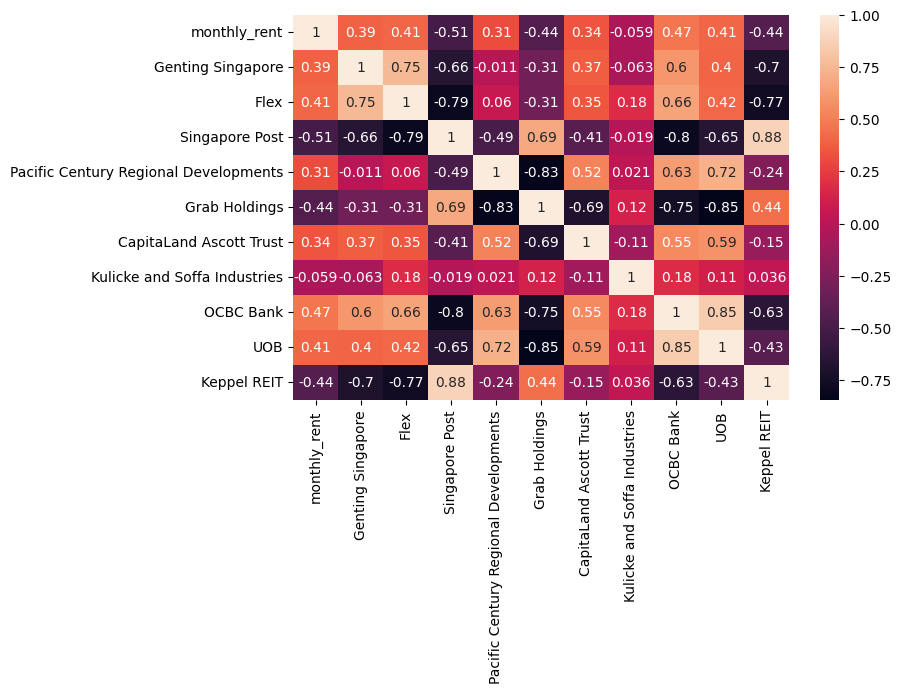

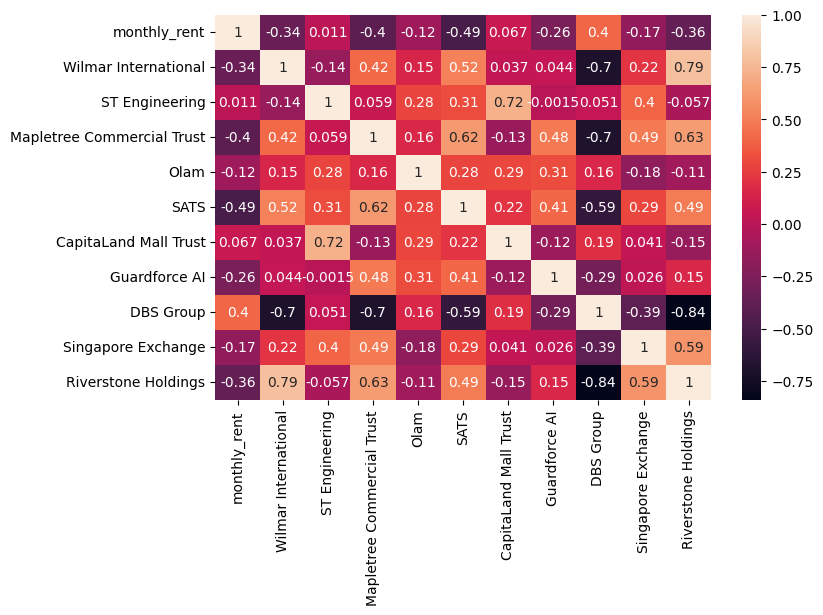

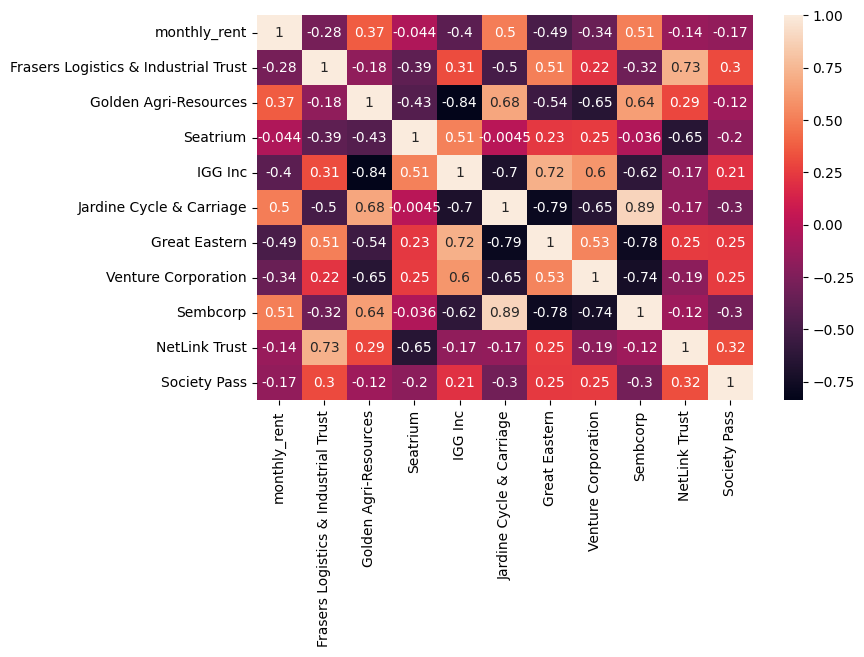

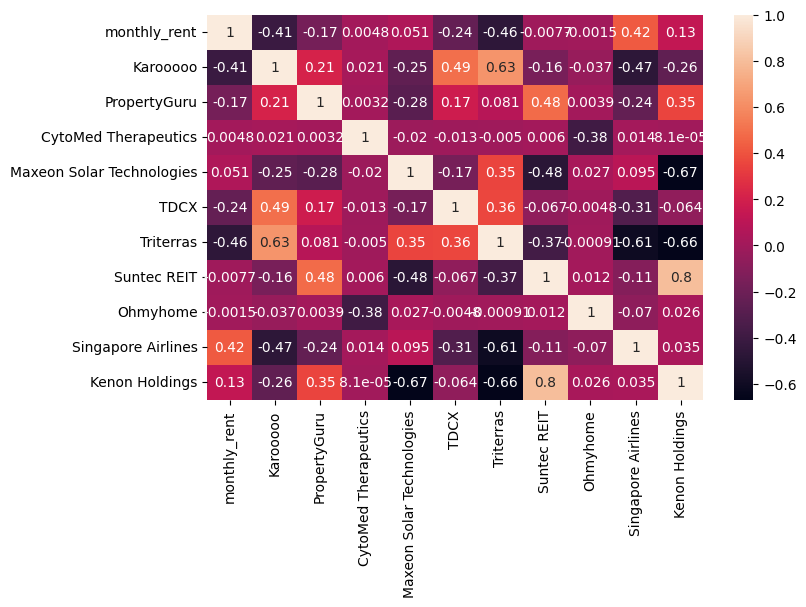

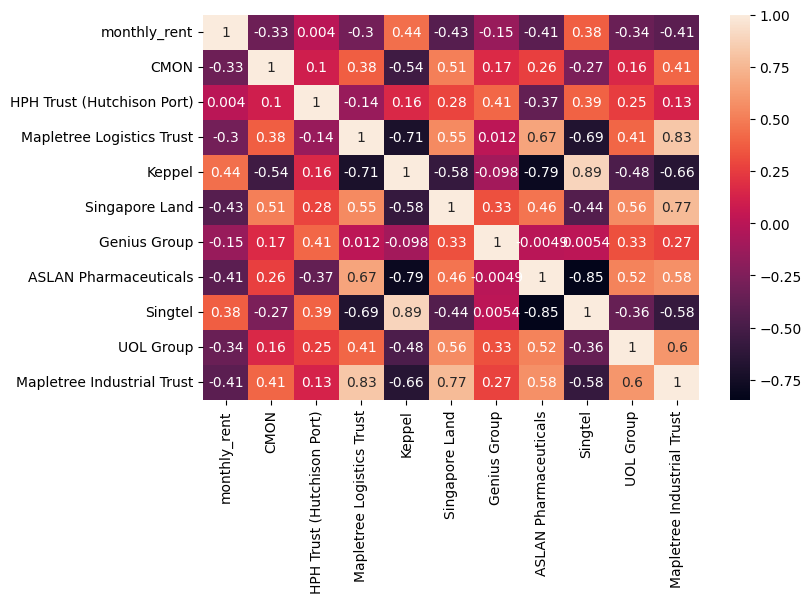

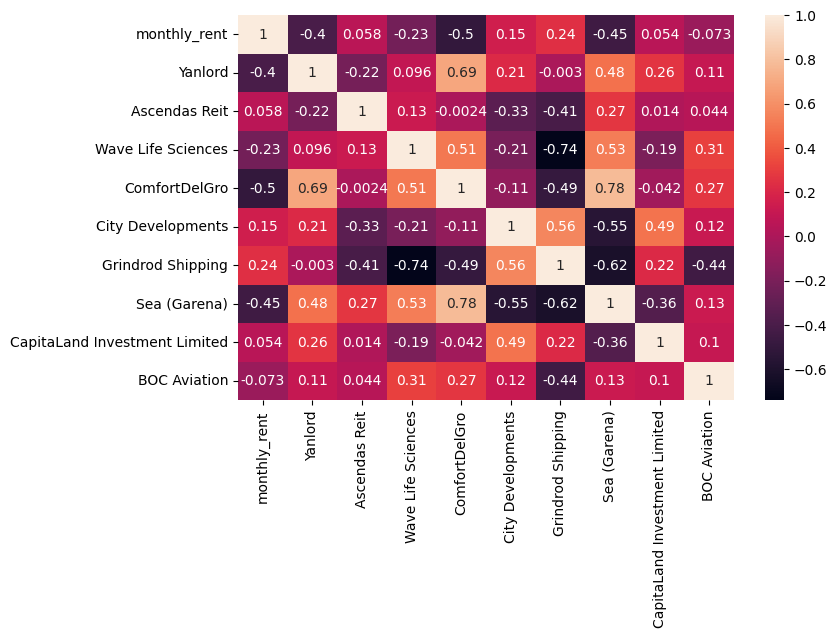

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in chunked:
    cor = merged[x].corr()
    plt.figure(figsize = (8, 5))
    sns.heatmap(cor, annot=True)

In [20]:
cor

,monthly_rent,Yanlord,Ascendas Reit,Wave Life Sciences,ComfortDelGro,City Developments,Grindrod Shipping,Sea (Garena),CapitaLand Investment Limited,BOC Aviation
monthly_rent,1.000000,-0.400789,0.057811,-0.227053,-0.503075,0.151437,0.238969,-0.452747,0.053998,-0.072806
Yanlord,-0.400789,1.000000,-0.221133,0.095700,0.691142,0.211511,-0.003023,0.482743,0.261083,0.105163
Ascendas Reit,0.057811,-0.221133,1.000000,0.129535,-0.002408,-0.325852,-0.411914,0.266866,0.014457,0.043711
Wave Life Sciences,-0.227053,0.095700,0.129535,1.000000,0.505026,-0.209592,-0.740252,0.527687,-0.192396,0.309039
ComfortDelGro,-0.503075,0.691142,-0.002408,0.505026,1.000000,-0.105549,-0.493480,0.776133,-0.042267,0.269457
City Developments,0.151437,0.211511,-0.325852,-0.209592,-0.105549,1.000000,0.559249,-0.551591,0.489257,0.120914
Grindrod Shipping,0.238969,-0.003023,-0.411914,-0.740252,-0.493480,0.559249,1.000000,-0.624590,0.215736,-0.443965
Sea (Garena),-0.452747,0.482743,0.266866,0.527687,0.776133,-0.551591,-0.624590,1.000000,-0.361888,0.126893
CapitaLand Investment Limited,0.053998,0.261083,0.014457,-0.192396,-0.042267,0.489257,0.215736,-0.361888,1.000000,0.102967
BOC Aviation,-0.072806,0.105163,0.043711,0.309039,0.269457,0.120914,-0.443965,0.126893,0.102967,1.000000


In [21]:
names.pop(-1)

'BOC Aviation'

In [22]:
merged['average_stock_value'] = merged[names].mean(axis=1)
merged['highest_pos_corr'] = merged[pos_corr_stocks].mean(axis=1)
merged['highest_neg_corr'] = merged[neg_corr_stocks].mean(axis=1)

<Axes: >

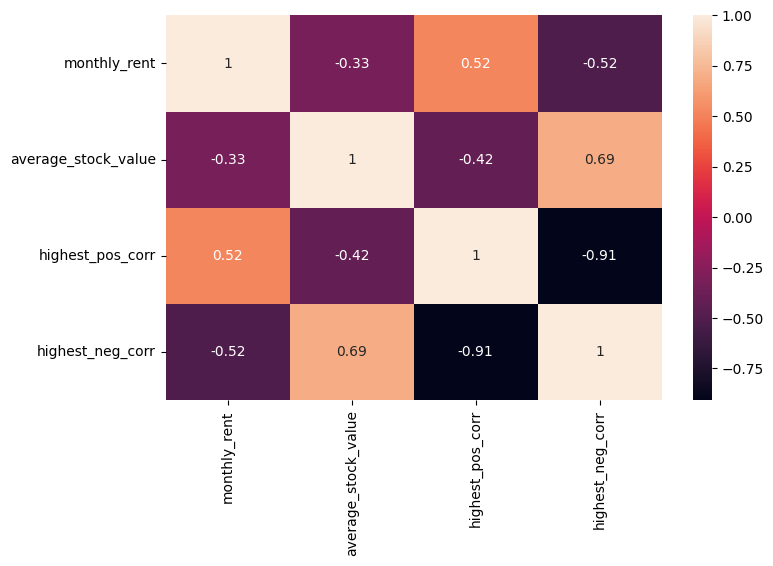

In [23]:
cor = merged[['monthly_rent', 'average_stock_value', 'highest_pos_corr', 'highest_neg_corr']].corr()
plt.figure(figsize = (8, 5))
sns.heatmap(cor, annot=True)

In [24]:
merged.head()

,rent_approval_date,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,region,monthly_rent,...,Triterras,UOB,UOL Group,Venture Corporation,Wave Life Sciences,Wilmar International,Yanlord,average_stock_value,highest_pos_corr,highest_neg_corr
0,2109,3,new generation,67.0,1983,1.344518,103.738630,yuhua east,west region,1600,...,0.484875,0.308177,0.464791,0.700061,0.484371,0.240160,0.704921,0.487642,0.226208,0.680303
1,2205,4,new generation,92.0,1978,1.330186,103.938717,bedok north,east region,2250,...,0.109340,0.731568,0.711902,0.554298,0.000000,0.357443,0.745667,0.504656,0.536469,0.411143
2,2210,3,improved,67.0,1971,1.332242,103.845643,toa payoh central,central region,1900,...,0.082133,0.503085,0.000000,0.291036,0.332209,0.000000,0.352612,0.240032,0.531528,0.107808
3,2108,6,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,east region,2850,...,0.475578,0.340520,0.593256,0.837185,0.494226,0.355767,0.723651,0.458750,0.244459,0.735903
4,2211,3,improved,68.0,1972,1.320502,103.863341,bendemeer,central region,2100,...,0.073121,0.853677,0.191281,0.554431,0.296295,0.272372,0.392933,0.314865,0.682277,0.105482


In [25]:
merged.drop(names, axis=1)
merged.drop(['year', 'month'], axis=1)

,rent_approval_date,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,region,monthly_rent,...,Triterras,UOB,UOL Group,Venture Corporation,Wave Life Sciences,Wilmar International,Yanlord,average_stock_value,highest_pos_corr,highest_neg_corr
0,2109,3,new generation,67.0,1983,1.344518,103.738630,yuhua east,west region,1600,...,0.484875,0.308177,0.464791,0.700061,0.484371,0.240160,0.704921,0.487642,0.226208,0.680303
1,2205,4,new generation,92.0,1978,1.330186,103.938717,bedok north,east region,2250,...,0.109340,0.731568,0.711902,0.554298,0.000000,0.357443,0.745667,0.504656,0.536469,0.411143
2,2210,3,improved,67.0,1971,1.332242,103.845643,toa payoh central,central region,1900,...,0.082133,0.503085,0.000000,0.291036,0.332209,0.000000,0.352612,0.240032,0.531528,0.107808
3,2108,6,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,east region,2850,...,0.475578,0.340520,0.593256,0.837185,0.494226,0.355767,0.723651,0.458750,0.244459,0.735903
4,2211,3,improved,68.0,1972,1.320502,103.863341,bendemeer,central region,2100,...,0.073121,0.853677,0.191281,0.554431,0.296295,0.272372,0.392933,0.314865,0.682277,0.105482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2109,3,new generation,67.0,1979,1.366050,103.854168,chong boon,north-east region,2200,...,0.484875,0.308177,0.464791,0.700061,0.484371,0.240160,0.704921,0.474963,0.226208,0.680303
59996,2304,4,model a,83.0,2019,1.286493,103.821434,henderson hill,central region,4100,...,0.013096,0.870336,0.631403,0.640269,0.319464,0.345762,0.273534,0.425979,0.749747,0.165451
59997,2206,5,improved,122.0,1988,1.355064,103.936507,tampines west,east region,2250,...,0.095671,0.549446,0.794091,0.484663,0.080491,0.286775,0.685768,0.459610,0.453691,0.360036
59998,2301,5,standard,123.0,1977,1.318974,103.944076,bedok south,east region,4700,...,0.022187,0.906165,0.412781,0.725134,0.408536,0.335733,0.649373,0.397231,0.712750,0.175092
